<a href="https://colab.research.google.com/github/fikriahmadsaputra/Data-Mining-/blob/main/UAS_Data_Mining_Fikri_Ahmad_Saputra_211011401465.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()


df = pd.read_csv("retail_sales_dataset.csv")


df.head()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Analisis awal dataset
print("Informasi Dataset:")
df.info()

print("\nDeskripsi Statistik Dataset:")
display(df.describe())

print("\nJumlah nilai unik per kolom:")
display(df.nunique())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Deskripsi Statistik Dataset:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000



Jumlah nilai unik per kolom:


,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


**ANALISIS KATEGORI PRODUK**





In [9]:
category_counts = df['Product Category'].value_counts()
print("Distribution of items per Product Category:")
print(category_counts)

Distribution of items per Product Category:
Product Category
1    351
2    342
0    307
Name: count, dtype: int64


**ANALISIS TOTAL SALES PER PRODUK KATEGORI**




In [10]:
total_sales_per_category = df.groupby('Product Category')['Total Amount'].sum()
print("Total sales per Product Category:")
print(total_sales_per_category)

Total sales per Product Category:
Product Category
0    143515
1    155580
2    156905
Name: Total Amount, dtype: int64


**VISUALISASI PRODUK KATEGORI SALES**



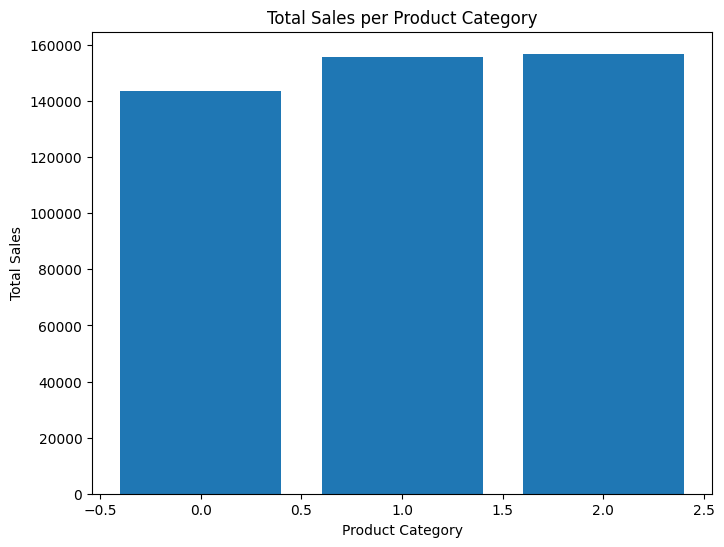

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(total_sales_per_category.index, total_sales_per_category.values)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Category')
plt.show()

**ANALISIS CUSTOMER BERDASARKAN GENDER**




In [12]:
gender_counts = df['Gender'].value_counts()
print("Number of customers per gender:")
print(gender_counts)

Number of customers per gender:
Gender
0    510
1    490
Name: count, dtype: int64


**ANALISIS CUSTOMER BERDASARKAN UMUR**




Deskripsi Statistik Kolom Usia:


,Age
count,1000.00000
mean,41.39200
std,13.68143
min,18.00000
25%,29.00000
50%,42.00000
75%,53.00000
max,64.00000


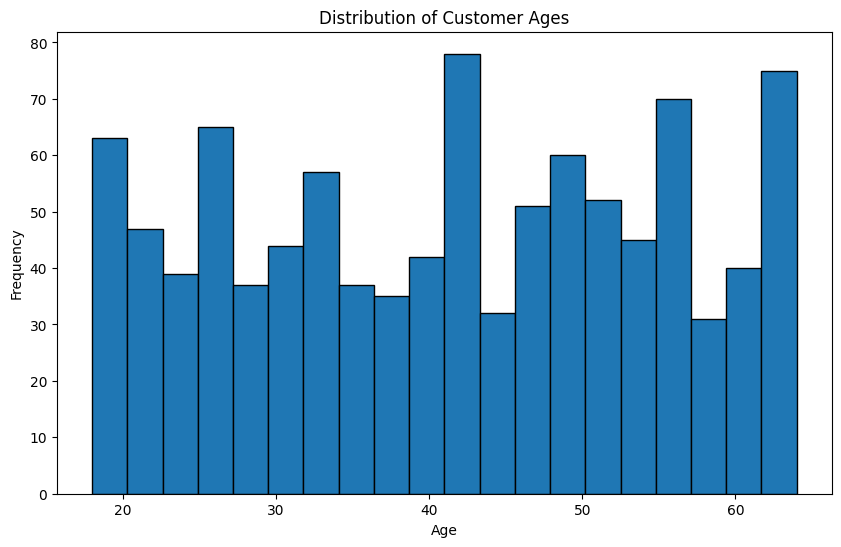

In [13]:
print("\nDeskripsi Statistik Kolom Usia:")
display(df['Age'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

**ANALISIS JUMLAH TOTAL PEMBELIAN PER CUSTOMER**

In [14]:
total_purchase_per_customer = df.groupby('Customer ID')['Total Amount'].sum()
print("Total purchase amount per customer:")
display(total_purchase_per_customer)

Total purchase amount per customer:


,Total Amount
Customer ID,
CUST001,150
CUST002,1000
CUST003,30
CUST004,500
CUST005,100
...,...
CUST995,30
CUST996,50
CUST997,90


**ANALISIS JUMLAH TOTAL PEMBELIAN PERGENDER**


In [15]:
total_purchase_per_gender = df.groupby('Gender')['Total Amount'].sum()
print("Total purchase amount per gender:")
print(total_purchase_per_gender)

Total purchase amount per gender:
Gender
0    232840
1    223160
Name: Total Amount, dtype: int64


**ANALISIS JUMLAH TOTAL PEMBELIAN PER AGE**



In [16]:
# Tentukan kelompok umur dan labelnya
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Buat kolom 'Kelompok Usia'
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Kelompokkan berdasarkan 'Kelompok Usia' dan hitung jumlah total pembelian
total_purchase_per_age_group = df.groupby('Age Group')['Total Amount'].sum()

# Cetak jumlah total pembelian untuk setiap kelompok umur
print("Total purchase amount per age group:")
print(total_purchase_per_age_group)

Total purchase amount per age group:
Age Group
18-25    74650
26-35    97090
36-45    96835
46-55    97235
56-65    90190
Name: Total Amount, dtype: int64


/tmp/ipython-input-16-1265708017.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_purchase_per_age_group = df.groupby('Age Group')['Total Amount'].sum()


**VISUALISASI GENDER DAN PRODUK KATEGORI**

Accuracy: 0.33
Confusion Matrix:
 [[26 31 16]
 [21 27 12]
 [30 24 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35        73
           1       0.33      0.45      0.38        60
           2       0.32      0.19      0.24        67

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.32       200
weighted avg       0.33      0.33      0.32       200



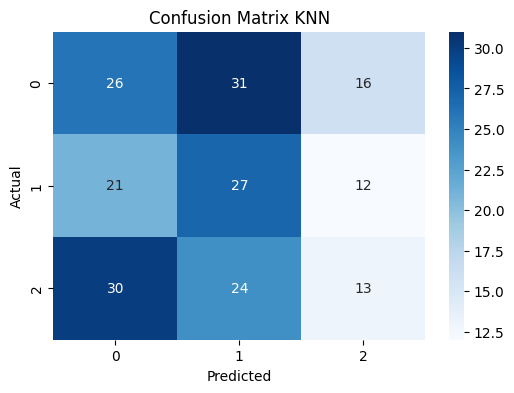

In [17]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as mp
import seaborn as sea


# label encoding kolom kategori
le_gender = LabelEncoder()
le_category = LabelEncoder()

# Sesuaikan le_gender dan le_category pada kolom asli sebelum melakukan transformasi
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Product Category'] = le_category.fit_transform(df['Product Category']) # Gunakan fit_transform di sini


# fitur dan target
X = df[['Gender', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']]
y = df['Product Category']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediksi
y_pred = knn.predict(X_test)

# evaluasi
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# report klasifikasi tanpa target_names untuk menghindari kesalahan sebelumnya
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# visualisasi
mp.figure(figsize=(6,4))
sea.heatmap(cm, annot=True, fmt='d', cmap='Blues')
mp.xlabel("Predicted")
mp.ylabel("Actual")
mp.title("Confusion Matrix KNN")
mp.show()

**KESIMPULAN**

Dataset terdiri dari 1000 transaksi dengan 9 kolom yang mencakup informasi transaksi, tanggal, pelanggan (ID, jenis kelamin, usia), kategori produk, kuantitas, harga per unit, dan jumlah total pembelian.
Tidak ada nilai yang hilang dalam dataset.
Kolom 'Date' saat ini masih dalam format objek (string), perlu diubah ke tipe data datetime jika ingin melakukan analisis berbasis waktu.

**Analisis Kategori Produk:**
Ada 3 kategori produk unik dalam dataset.
Distribusi item antar kategori produk cukup merata.
Total penjualan tampaknya sedikit bervariasi antar kategori, dengan salah satu kategori menunjukkan total penjualan yang sedikit lebih tinggi dibandingkan yang lain (berdasarkan visualisasi bar plot).

**Analisis Pelanggan:**
Jumlah pelanggan laki-laki dan perempuan dalam dataset relatif seimbang.
Distribusi usia pelanggan bervariasi, mencakup rentang usia yang luas dari 18 hingga 64 tahun, dengan distribusi yang cenderung normal (berdasarkan histogram).
Total pembelian per pelanggan sangat bervariasi, menunjukkan adanya perbedaan perilaku pembelian antar individu.
Total pembelian antara pelanggan laki-laki dan perempuan relatif seimbang.
Ketika dikelompokkan berdasarkan rentang usia, total pembelian untuk setiap kelompok usia menunjukkan kontribusi yang bervariasi terhadap total pendapatan.
Analisis KNN

**Klasifikasi Kategori Produk**:
Model KNN yang dilatih untuk memprediksi kategori produk berdasarkan fitur-fitur tertentu (Jenis Kelamin, Usia, Kuantitas, Harga per Unit, Jumlah Total) menunjukkan akurasi sekitar 33%.
Confusion matrix dan classification report menunjukkan bahwa model ini memiliki kesulitan dalam memprediksi kategori produk dengan tepat, dengan skor presisi, recall, dan f1-score yang rendah untuk semua kategori. Ini menunjukkan bahwa fitur yang digunakan mungkin tidak cukup untuk secara akurat mengklasifikasikan kategori produk menggunakan model KNN.

**Kesimpulan dari semua ini**:
Dataset memberikan gambaran yang baik tentang transaksi penjualan, demografi pelanggan, dan kinerja kategori produk. Ada potensi untuk analisis lebih lanjut, terutama pada analisis berbasis waktu setelah mengonversi kolom 'Date'. Model klasifikasi KNN yang dicoba menunjukkan bahwa memprediksi kategori produk berdasarkan fitur yang ada saat ini cukup menantang, mungkin memerlukan fitur tambahan atau model yang berbeda untuk akurasi yang lebih baik.